# Earrings Object Detection

In [ ]:
!pip install ultralytics==8.0.146

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 605.5/605.5 kB 11.2 MB/s eta 0:00:00


In [ ]:
import ultralytics  ##就是yoloV8
ultralytics.checks()

Ultralytics YOLOv8.0.146 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.9/78.2 GB disk)


In [ ]:
from ultralytics import YOLO
from IPython.display import display, Image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
## 檢查是否有所需的檔案
!ls //content/drive/MyDrive/earrings_object_detection/Yolo/data

classes.txt	earring_opencv.zip    earringP.yaml  test_photo
earring_opencv	earring_original.zip  earring.yaml


In [ ]:
# copy over the dataset into the root directory of the Colab VM

### 確認檔名ㄚㄚㄚ!
!cp /content/drive/MyDrive/earrings_object_detection/Yolo/data/earring_opencv.zip /content

In [ ]:
# unzip the dataset and the contents so that they are now in /content folder

### 確認檔名ㄚㄚㄚ!
!unzip /content/earring_opencv.zip -d /content/

串流輸出內容已截斷至最後 5000 行。
  inflating: /content/earring_opencv/labels/train/sliver_hook109.txt  
  inflating: /content/earring_opencv/labels/train/21_blue_polygon220.txt  
  inflating: /content/earring_opencv/labels/train/sliver_hook110.txt  
  inflating: /content/earring_opencv/labels/train/21_blue_polygon221.txt  
  inflating: /content/earring_opencv/labels/train/sliver_hook111.txt  
  inflating: /content/earring_opencv/labels/train/21_blue_polygon222.txt  
  inflating: /content/earring_opencv/labels/train/sliver_hook113.txt  
  inflating: /content/earring_opencv/labels/train/21_blue_polygon224.txt  
  inflating: /content/earring_opencv/labels/train/sliver_hook114.txt  
  inflating: /content/earring_opencv/labels/train/21_blue_polygon225.txt  
  inflating: /content/earring_opencv/labels/train/sliver_hook118.txt  
  inflating: /content/earring_opencv/labels/train/21_blue_polygon226.txt  
  inflating: /content/earring_opencv/labels/train/sliver_hook121.txt  
  inflating: /content/earring_op

# Train Model

In [ ]:
# https://docs.ultralytics.com/usage/cli/
# https://github.com/roboflow/notebooks/blob/main/notebooks/train-yolov8-object-detection-on-custom-dataset.ipynb

# data: yaml file to define path to data, classes' names
# model: yolov8x.pt yolov8l.pt yolov8m.pt yolov8s.pt yolov8n.pt
# a full list of train arguments: https://docs.ultralytics.com/usage/cfg/

## 模型訓練
!yolo task=detect mode=train model=yolov8s.pt data=/content/drive/MyDrive/earrings_object_detection/Yolo/data/earring.yaml batch=16 epochs=12 imgsz=256 plots=True

100% 21.5M/21.5M [00:00<00:00, 216MB/s]
New https://pypi.org/project/ultralytics/8.0.215 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.146 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/earrings_object_detection/Yolo/data/earring.yaml, epochs=12, patience=50, batch=16, imgsz=256, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, 

# Evaluate Model

In [ ]:
## To save model weights to your google drive!

!cp '/content/runs/detect/train/weights/best.pt' /content/drive/MyDrive/earrings_object_detection/Yolo/Training_records/#18_1121
!cp '/content/runs/detect/train/weights/last.pt' /content/drive/MyDrive/earrings_object_detection/Yolo/Training_records/#18_1121

cp: cannot stat '/content/runs/detect/train/weights/best.pt': No such file or directory
cp: cannot stat '/content/runs/detect/train/weights/last.pt': No such file or directory


In [ ]:
# check training metrics:
# /content/runs/detect/train/results.png
# /content/runs/detect/train/confusion_matrix.png

In [ ]:
Image(filename='/content/runs/detect/train2/results.png', width=600)

# !cp '/content/runs/detect/train/results.png' /content/drive/MyDrive/earrings_object_detection/Yolo/Training_records

FileNotFoundError: ignored

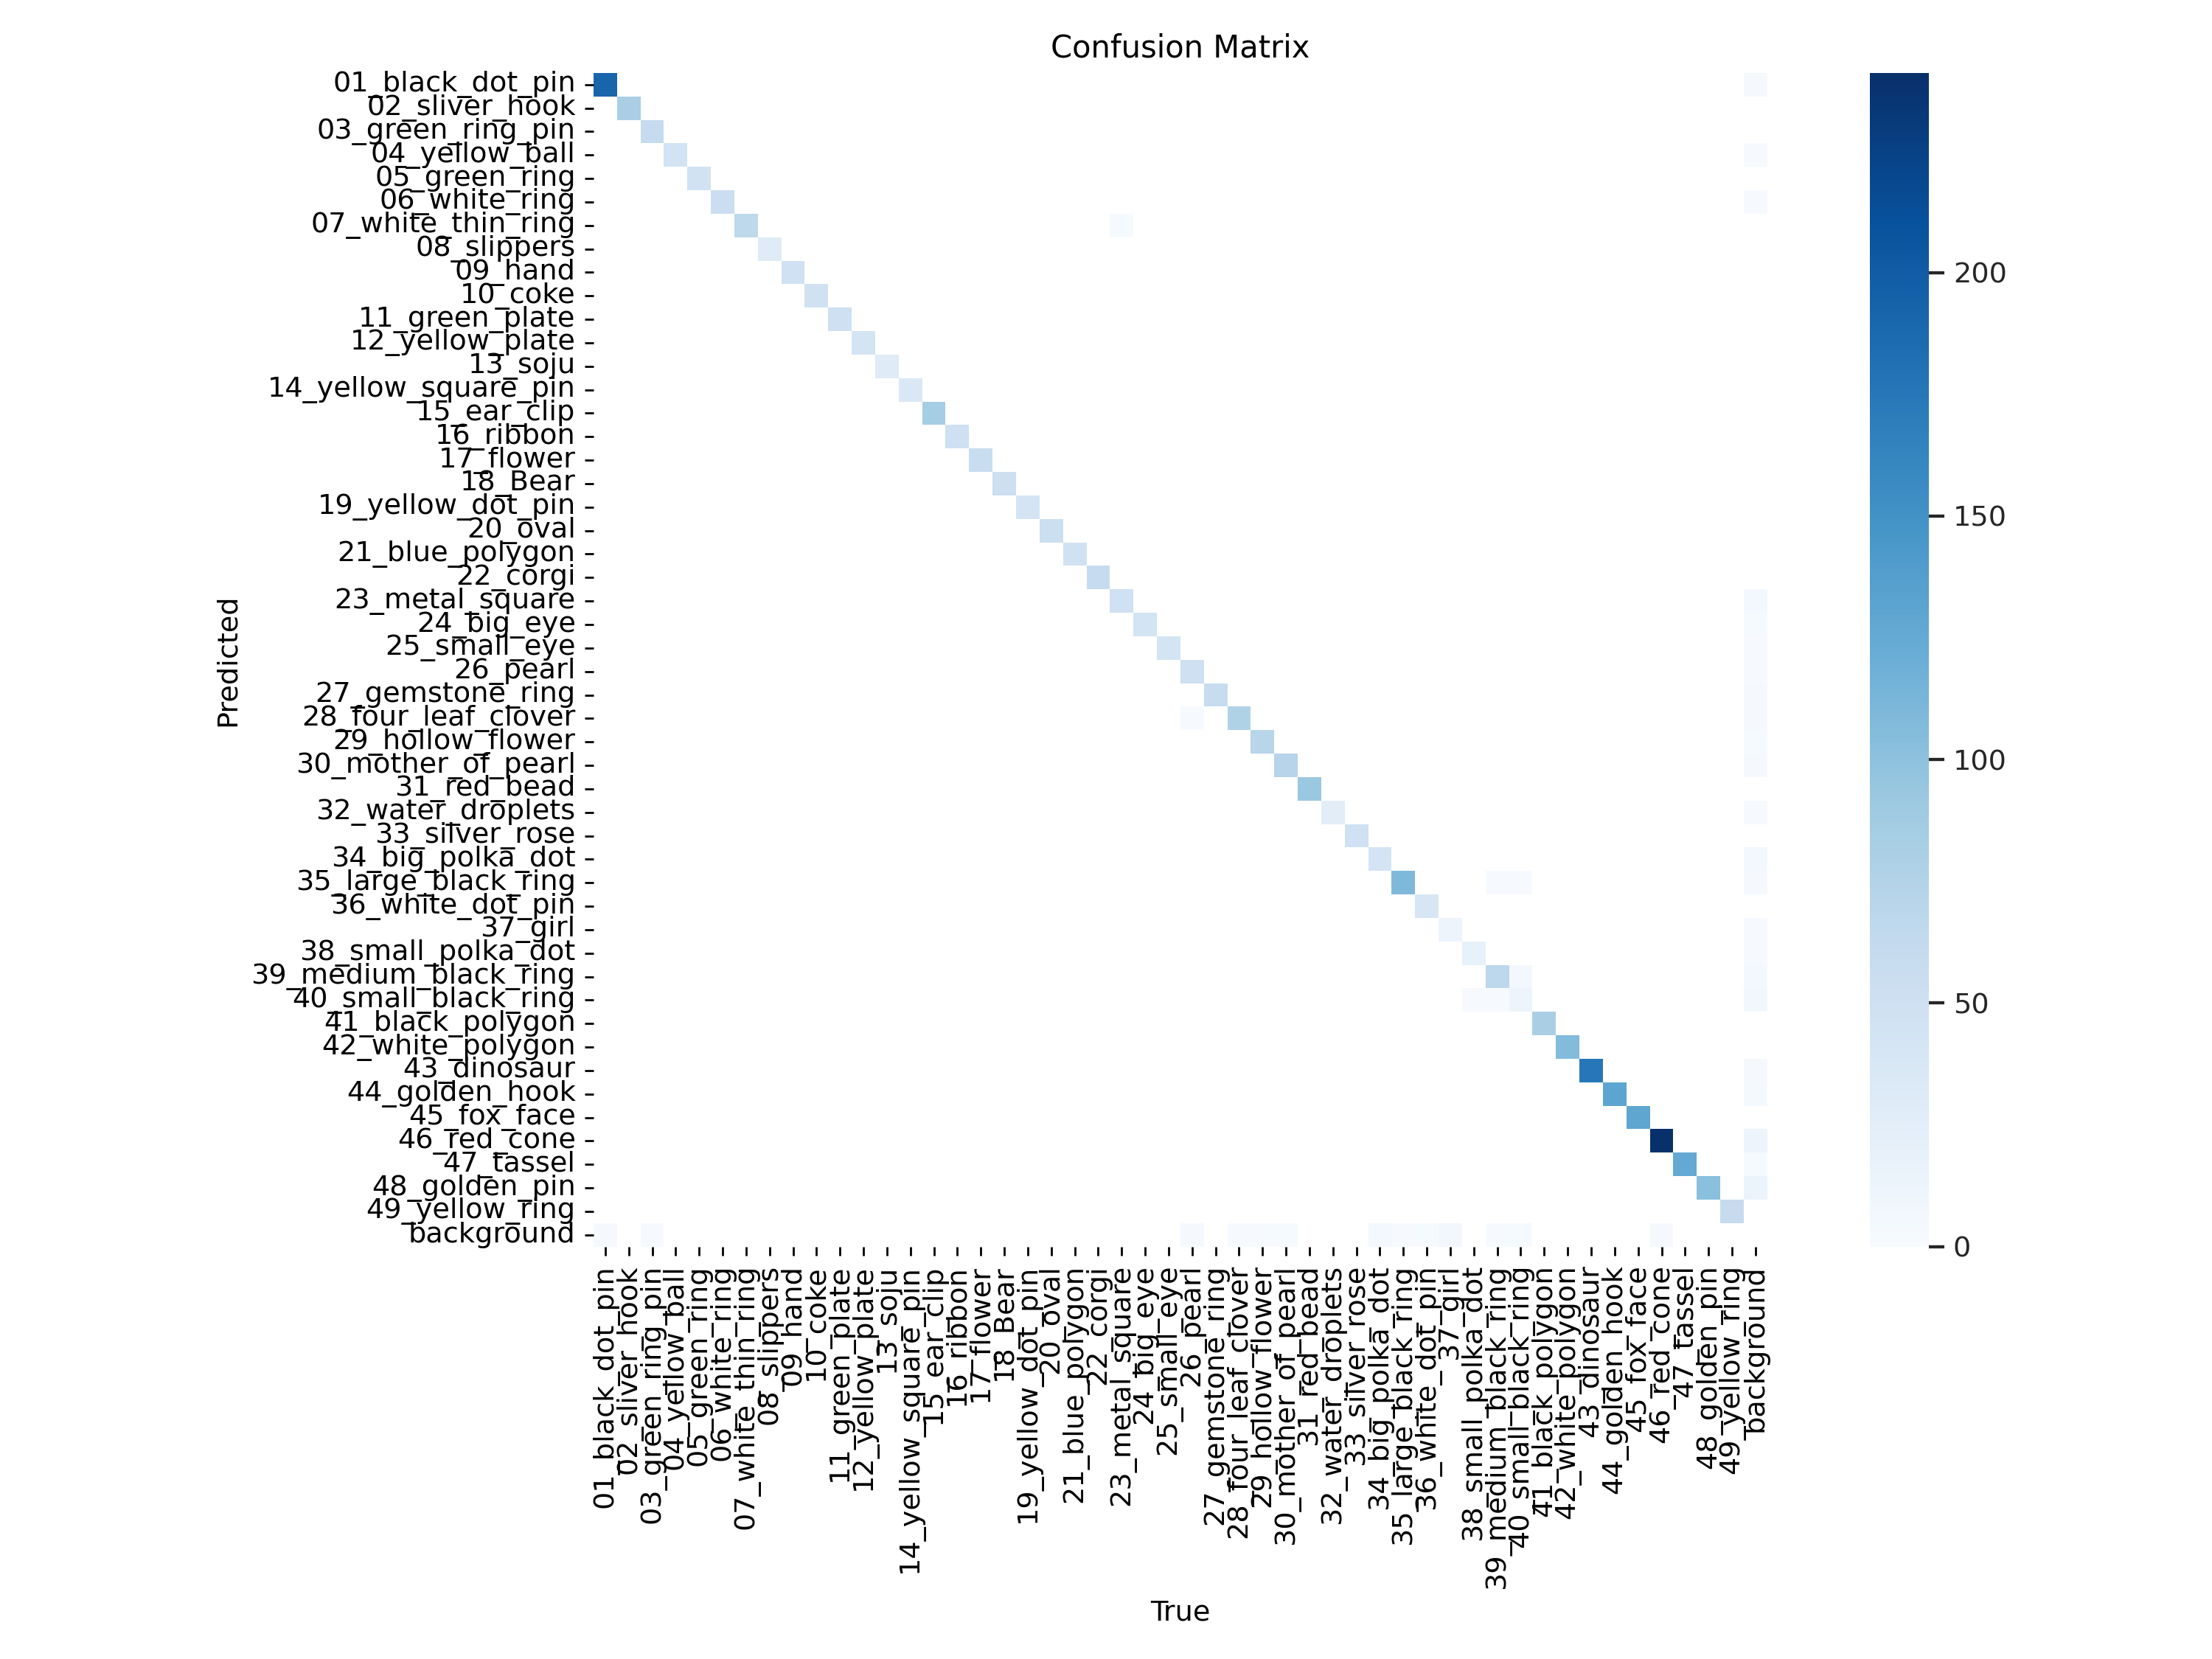

In [ ]:
Image(filename='/content/runs/detect/train2/confusion_matrix.png', width=600)

!cp '/content/runs/detect/train2/confusion_matrix.png' '/content/drive/MyDrive/2023project/earrings_object_detection/Yolo/Training_records'

# !cp '/content/runs/detect/train/confusion_matrix.png' /content/drive/MyDrive/2023project/earrings_object_detection/Yolo/Training_records

##**Inference on test data**

In [ ]:
## 載入模型與欲偵測的圖片或影片


!yolo task=detect mode=predict model=/content/drive/MyDrive/earrings_object_detection/Yolo/Training_records/#21_1122/best.pt conf=0.25 iou=0.7 imgsz=256 source=/content/drive/MyDrive/earrings_object_detection/Yolo/data/test_photo/9.JPG save=True
# 預設 conf=0.25, iou=0.7
##若模型的訓練結果不好，1.可以調conf/iou參數，調鬆一點，讓它偵測到，但也有可能不是物件的也被偵測到

2023-11-24 00:07:56.645353: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-24 00:07:56.645411: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-24 00:07:56.645444: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
Ultralytics YOLOv8.0.146 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11144547 parameters, 0 gradients

image 1/1 /content/drive/MyDrive/earrings_object_detection/Yolo/data/test_photo/9.JPG: 256x256 2 02_sliver_hooks, 1 04_yellow_ball, 1 05_green_ring, 1 06_white_ring, 1 08_slippers, 1 10_coke, 1 44_golden_h

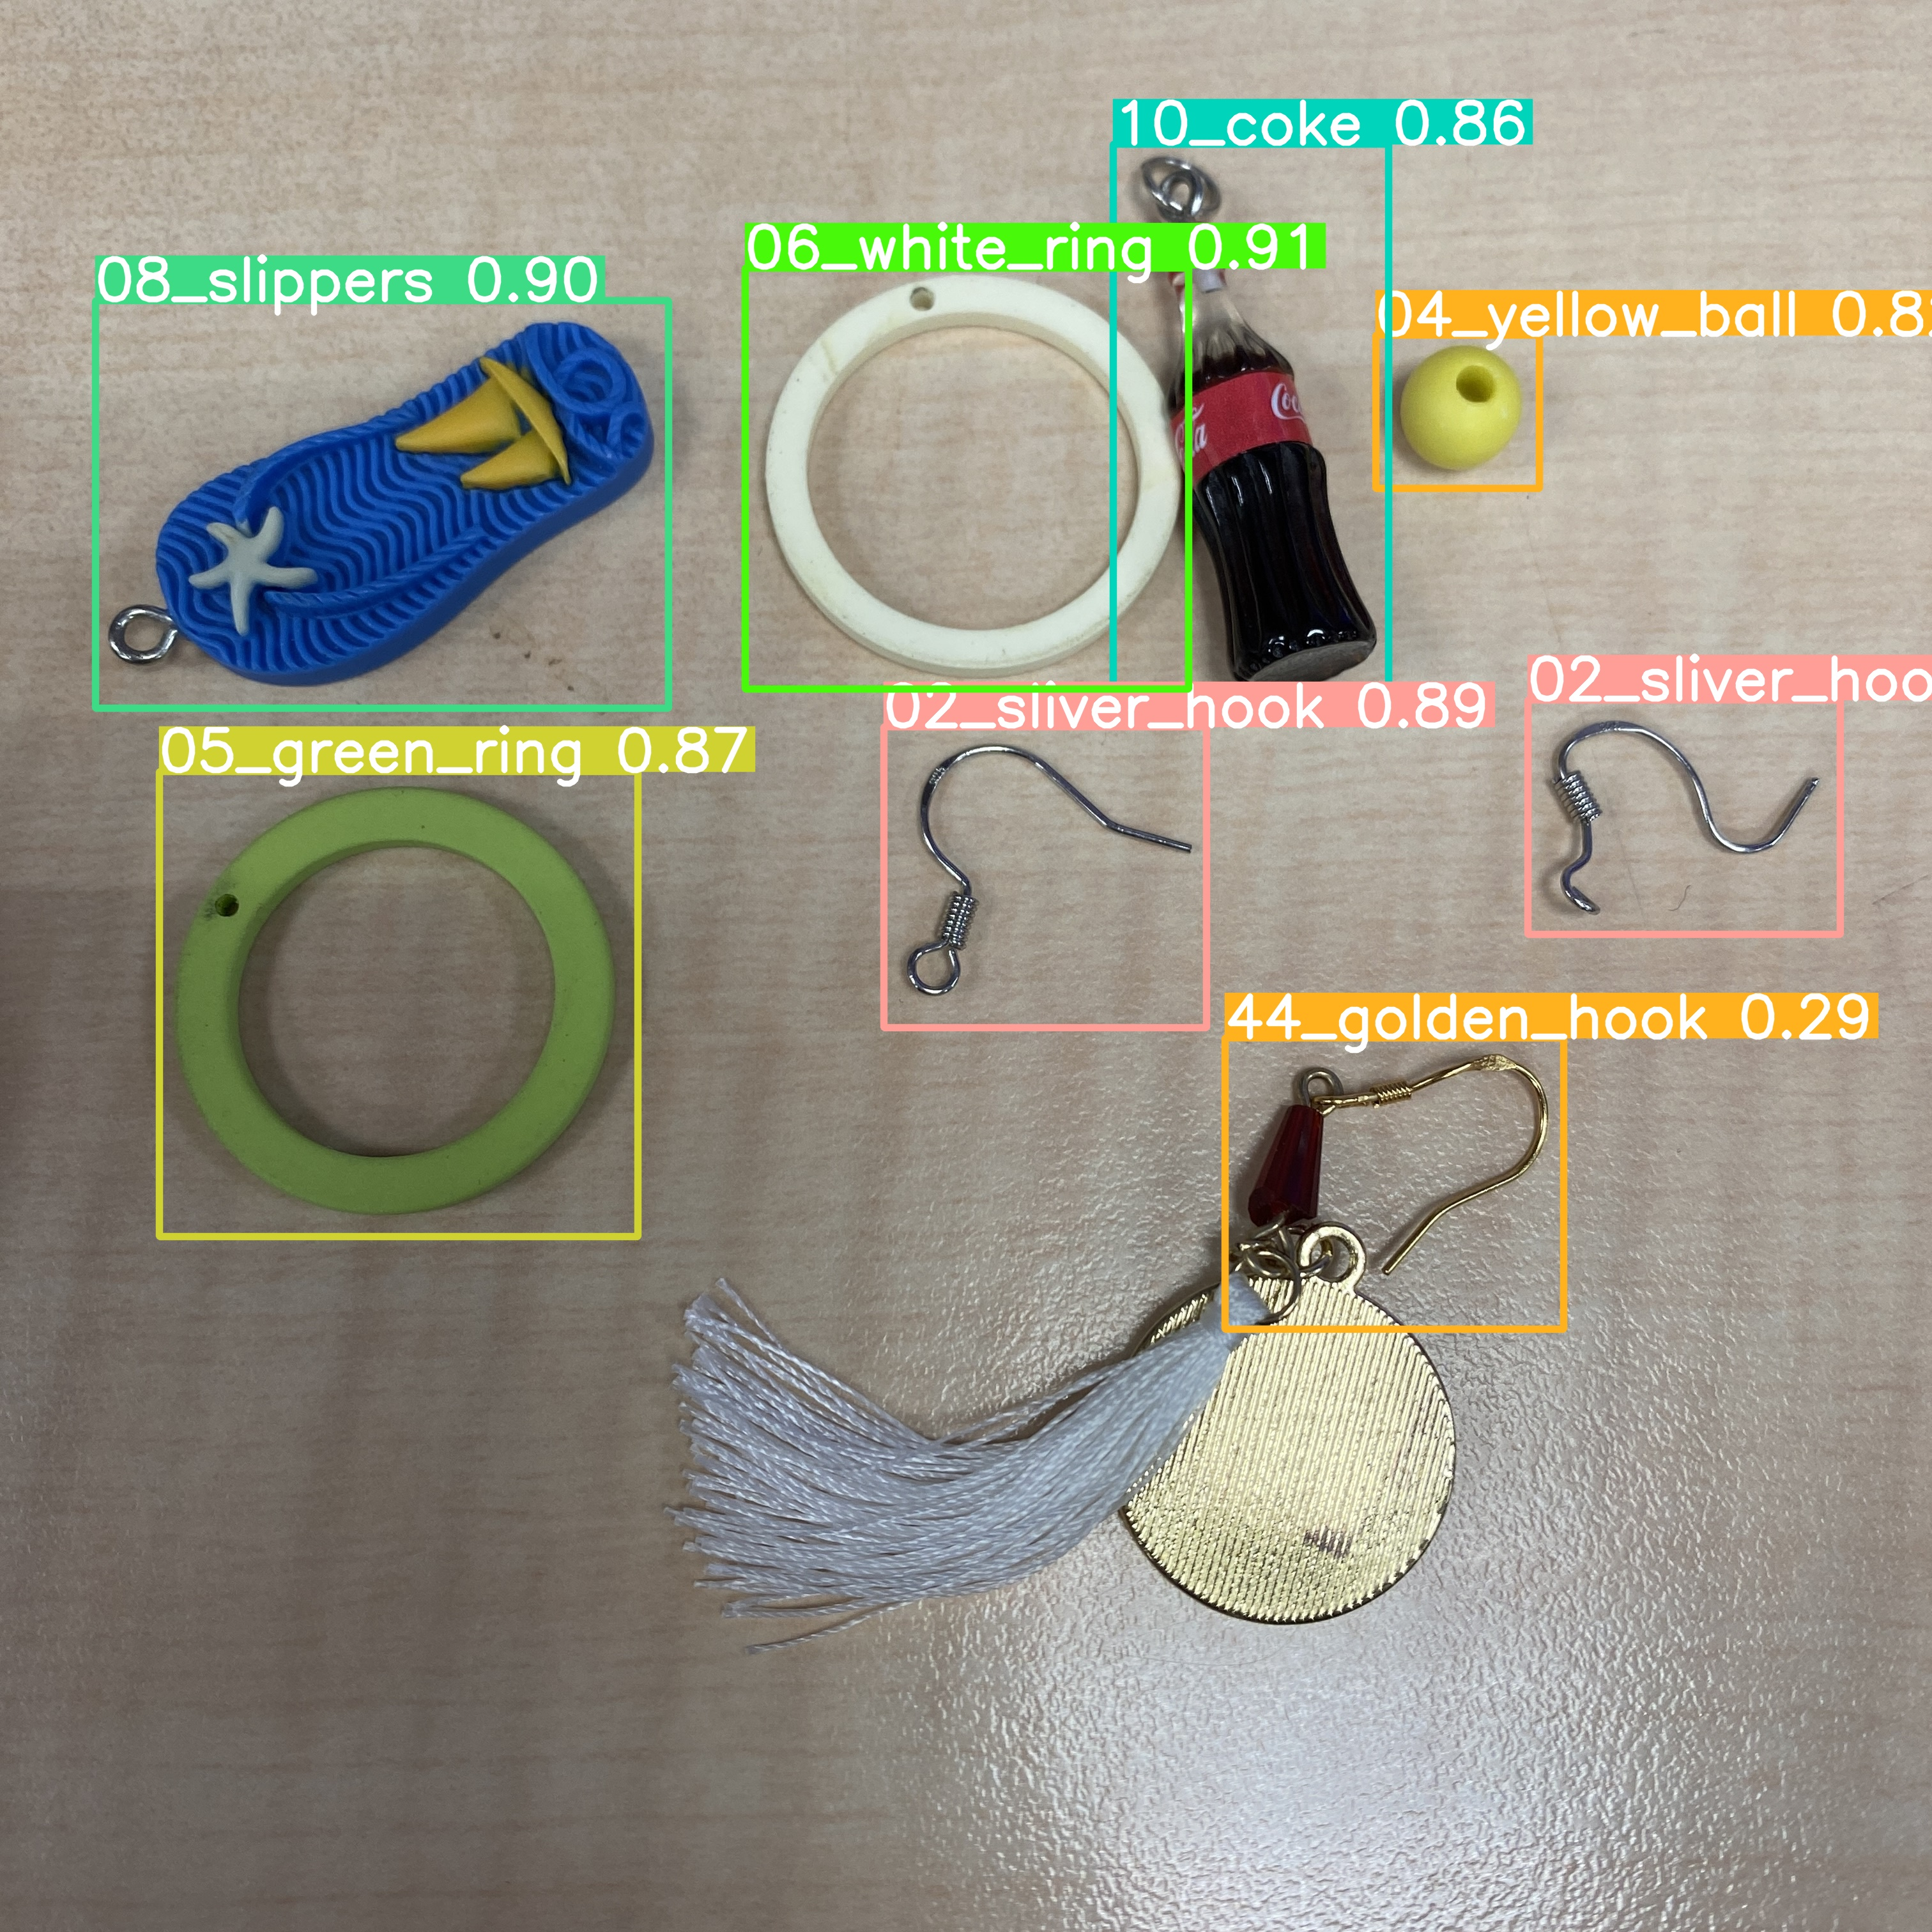

In [ ]:
## 圖示結果
display(Image(filename='/content/runs/detect/predict2/9.JPG', width=400))

In [ ]:
!cp '/content/runs/detect/predict2/3.JPG' /content/drive/MyDrive/earrings_object_detection/Yolo/Training_records/#18_1121

In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train2/weights/best.pt conf=0.25 source=/content/drive/MyDrive/earrings_object_detection/Yolo/data/test_photo/hand277.jpg save=True

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 396, in entrypoint
    model = YOLO(model, task=task)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/model.py", line 94, in __init__
    self._load(model, task)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/model.py", line 140, in _load
    self.model, self.ckpt = attempt_load_one_weight(weights)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py", line 621, in attempt_load_one_weight
    ckpt, weight = torch_safe_load(weight)  # load ckpt
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py", line 560, in torch_safe_load
    return torch.load(file, map_location='cpu'), file  # load
  File "/usr/local/lib/python3.10/dist-packages/torch/serialization.py", line 986, in load
    with _open_file_like(f, 'rb') as opened

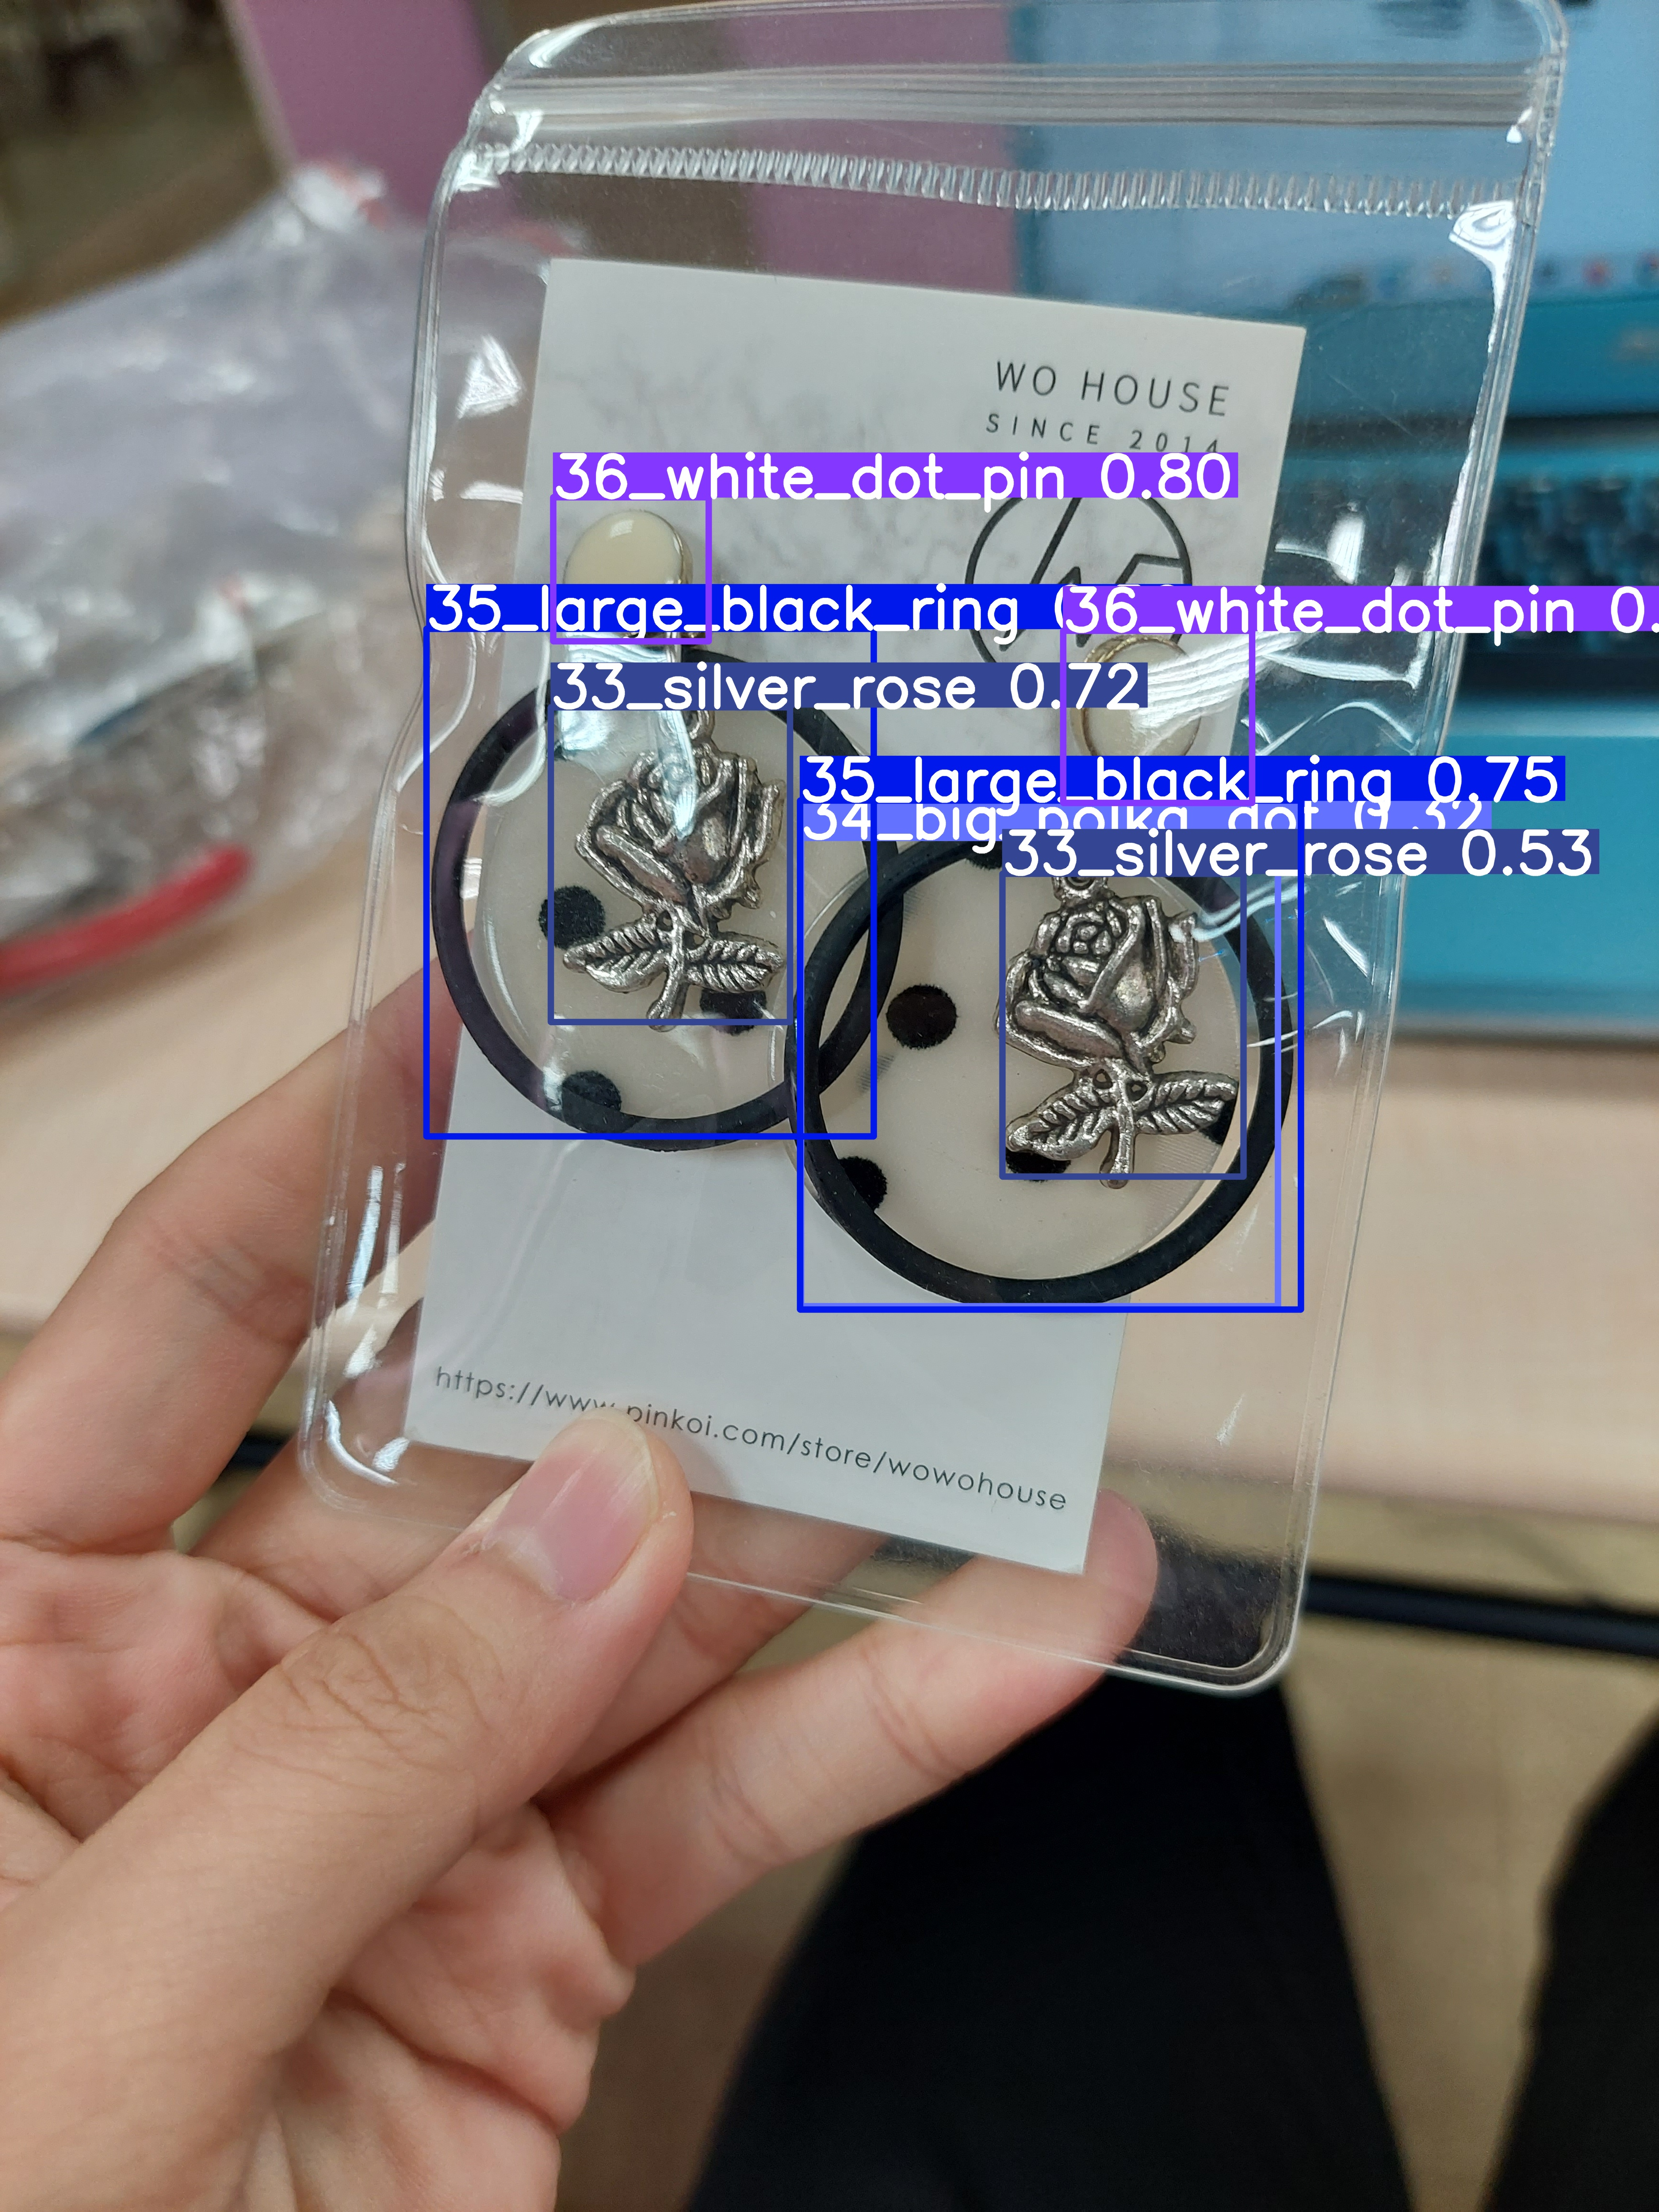

In [ ]:
display(Image(filename='/content/runs/detect/predict3/Rose.jpg', width=600))